# Final Project

In [1]:
# Run before loading the rest of the project

library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
options(repr.matrix.max.rows = 6)
source("cleanup.R")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
# Sets seed for the project, run before running the rest of the project
set.seed(2025)

- A set seed is used to ensure reproducibility. Every time an R kernel is started, it generates a new seed. This results in massive varience between runs. Having a seed set prevents the varience, allowing the same results from being reproduced, no matter where the code is run. (Timbers et al., 2022)

## 1. Introduction
Video games are becoming increasingly popular worldwide, and predicting player actions based on their characteristics is crucial for informing business decisions in the gaming industry. A research group in Computer Science at UBC, led by Frank Wood, is collecting data about how people play video games. They have set up a Minecraft server, and players' actions are recorded as they navigate through the world. For this project, we will use this dataset to identify which player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, as well as exploring how these features differ between various player types.

### Key Question
Can `Age` and `played_hours` predict `subscribe` in `players.csv` dataset?
### Data Description

The dataset we will use in this project is from `players.csv`, a list of all unique players, including data about each player.

- Number of observations: 196
- Number of variables: 7

| Key Variables | `name`  | `gender` | `Age`    | `hashedEmail` | `played_hours` | `subscribe` | `experience` |
| :------------ | :------:| :------: | :-------:| :-----------: | :-----------:  |:-----------:|:-----------: |
| Type          |   chr   |   chr    |  dbl     |   chr         |       dbl      |     lgl     |      chr     |
| Max           |      /  |    /     |  50      |     /         |      223.1     |       /     |    /         |
| Min           |     /   |   /      |   8      |      /        |        0       |      /      |     /        |
| Mean          |      /  |  /       | 20.52062 |       /       |     5.904639   |     /       |      /       |

- Key Variables Meaning:
  - `name`: The name of the players.
  - `gender`: The gender of the players.
  - `Age`: The age of the players.
  - `hashedEmail`: Anonymized unique identifier for players.
  - `played_hours`: The total time of players spending on playing this game.
  - `subscribe`: If the players subscribe or not (True for subscribed, False for not subscribed).
  - `experience`: Different experience levels of each players.
--------------------------------
For this project, there are 3 key variables from dataset `players.csv` for the analysis:
  - `Age`: The age of the players.
  - `played_hours`: Total time players spend on playing this game.
  - `subscribe`: If the players subscribe or not (True = 1, False = 0).

By analysing the three variables we can identify how well the variables (`Age` and `played_hours`) can predict subscription (`subscribe`) likelihood.

## 2. Methods & Results:

This project will utilize a KNN classification model to answer our key question. The following section covers the process from data loading to visulizations from the data. 

K Nearest Neighbours (KNN) is an algorithm that predicts a label for new observations. For every new point without a label, the algorithm will find `K` number of existing points closest to the new point through calculating the straight line distance between the points. After obtaining the closest points, the new data will then be labelled dpeending on the labels that appear the most within the `K` points. 

For instance, if `K=3` and 2 of those existing points are labelled `A`, as the majority are labelled `A`, the new point would also be labelled `A`. (Timbers et al., 2022)

### Loading Data

In order to work with the data, it must be loaded into R. This function takes the external source of the data and loads it into an object, preparing it for our manipulation. 

The data comes from a research group called the Pacific Laboratory for Artifical Intelligence based in UBC. 

In [3]:
# Loading data
players <- read_csv("https://raw.githubusercontent.com/Vivian-Bi/ds_project_individual/refs/heads/main/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


### Data Wrangling

After loading the data, it needs to be "tidied" before analysis can be preformed. 

Data is considered "tidy" if it meets the following criteria:

- Each row has a single observation (a measurement)
- Each column has a single variable (Characteristic, or quantity that can be measured)
- Each value (Single measurement of a variable) is in a single cell

(Timbers et al., 2022)

In addition to tyding the data, it must be wrangled to a point where it can fit the needs of the analysis. For instance, this can entail selecting specific columns from the original dataframe that are useful, while leaving the rest.

In [4]:
player_data<- players |>
    select(subscribe, played_hours, Age) |>
    mutate(subscribe = as.numeric(subscribe)) |> #1 = TRUE, 0 = FALSE
    mutate(subscribe = as_factor(subscribe)) |>
    filter(Age != 'NA')
player_data

subscribe,played_hours,Age
<fct>,<dbl>,<dbl>
1,30.3,9
1,3.8,17
0,0.0,17
⋮,⋮,⋮
0,0.3,22
0,0.0,17
0,2.3,17


The final model will requires the `Age` and `played_hours` variables as predictors so these columns are selected from the main dataframe. The `subscribe` variable is the intended label for predction, so it is also selected from the original dataframe. 

As the `subscribe` variable was previously a boolean, it was converted into a binary representation as KNN models require all variables to be numeric for calculations.

This completes the data tyding and wrangling step. There is little tidying to do, as the specific columns that are being used fit the tidy data criteria.

- Should we remove entries where the played hours is 0?

### Summary of Data For Exploratory Analysis

After tiding the data, exploratory analysis can be conducted. This will entail gathering the average, maxiumum, and minimum values of each variable from the dataframe that will be used in the main analysis.

In [5]:
## Calculating summery for hours data
mean_hours <- player_data |>
    select(played_hours) |>
    map(mean, na.rm = TRUE)

max_hours <- player_data |>
    select(played_hours) |>
    max(na.rm = TRUE)

min_hours <- player_data |>
    select(played_hours) |>
    min(na.rm = TRUE)

## Collecting the data into a table
time_values <- player_data |> 
    group_by() |>
    summarize(mean_hours, max_hours, min_hours)
time_values

## Calculating summery for age data
mean_age <- player_data |>
    select(Age) |>
    map(mean, na.rm = TRUE)

max_age <- player_data |>
    select(Age) |>
    max(na.rm = TRUE)

min_age <- player_data |>
    select(Age) |>
    min(na.rm = TRUE)

## Collecting the data into a table
age_values <- player_data |> 
    group_by() |>
    summarize(mean_age, max_age, min_age)
age_values

mean_hours,max_hours,min_hours
<named list>,<dbl>,<dbl>
5.904639,223.1,0


mean_age,max_age,min_age
<named list>,<dbl>,<dbl>
20.52062,50,8


The summery statistics now provides an idea of how the data looks prior to analysis. This also provides a basis for creating visualizations (graphs) of the exploratory analysis, giving a picture of the data as a whole before being put under greater scrutiny. 

### Visualizations of Exploratory Analysis

The following now plots the data from the exploratory analysis into simple graphs. 

Warning message in geom_bar(state = identity):
“Ignoring unknown parameters: `state`”
Warning message in scale_x_log10(labels = label_comma()):
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 85 rows containing non-finite outside the scale range (`stat_count()`).”


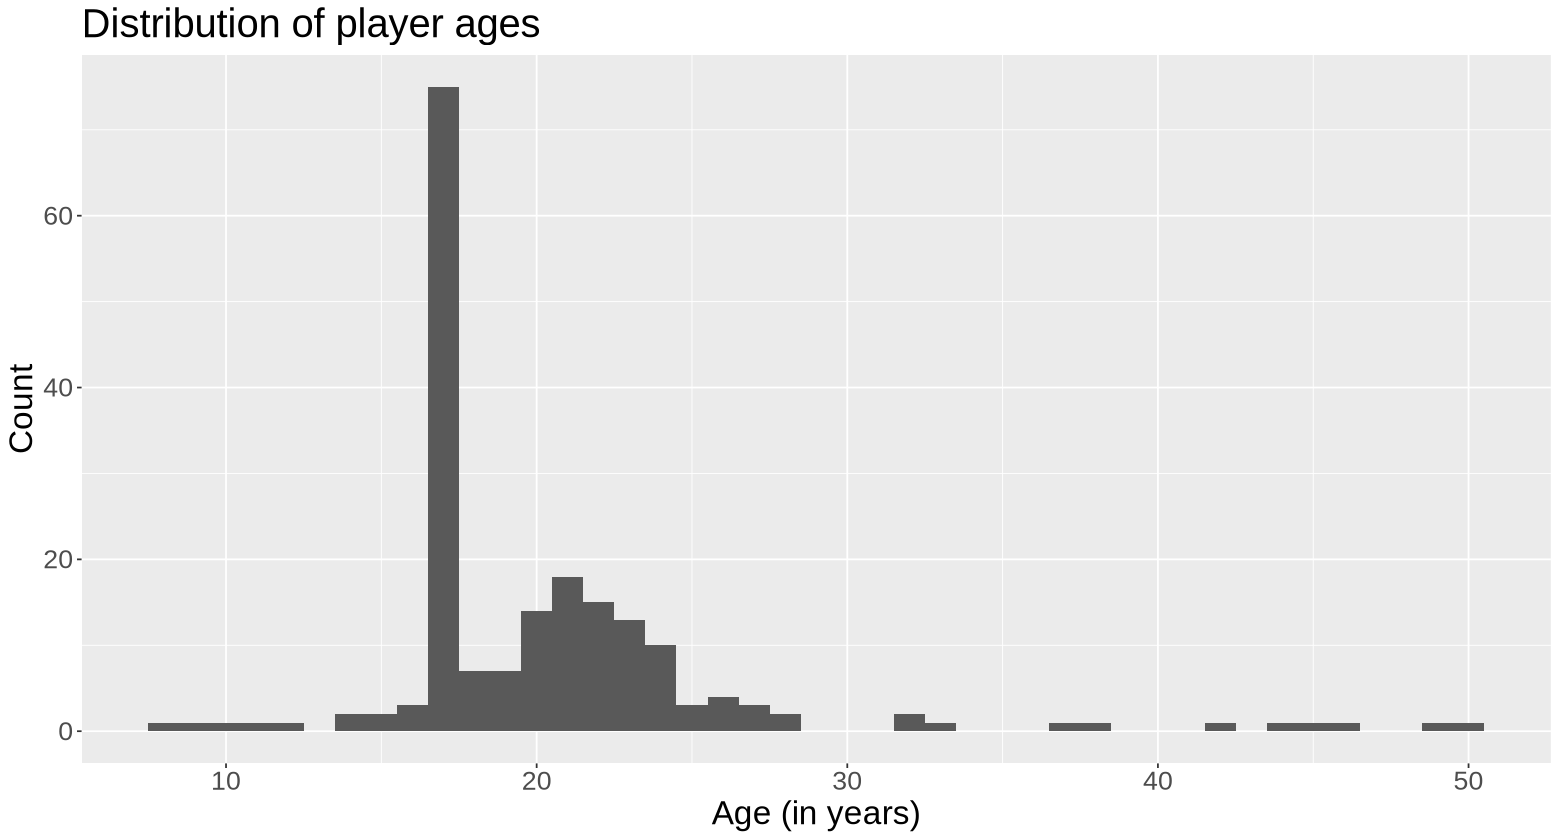

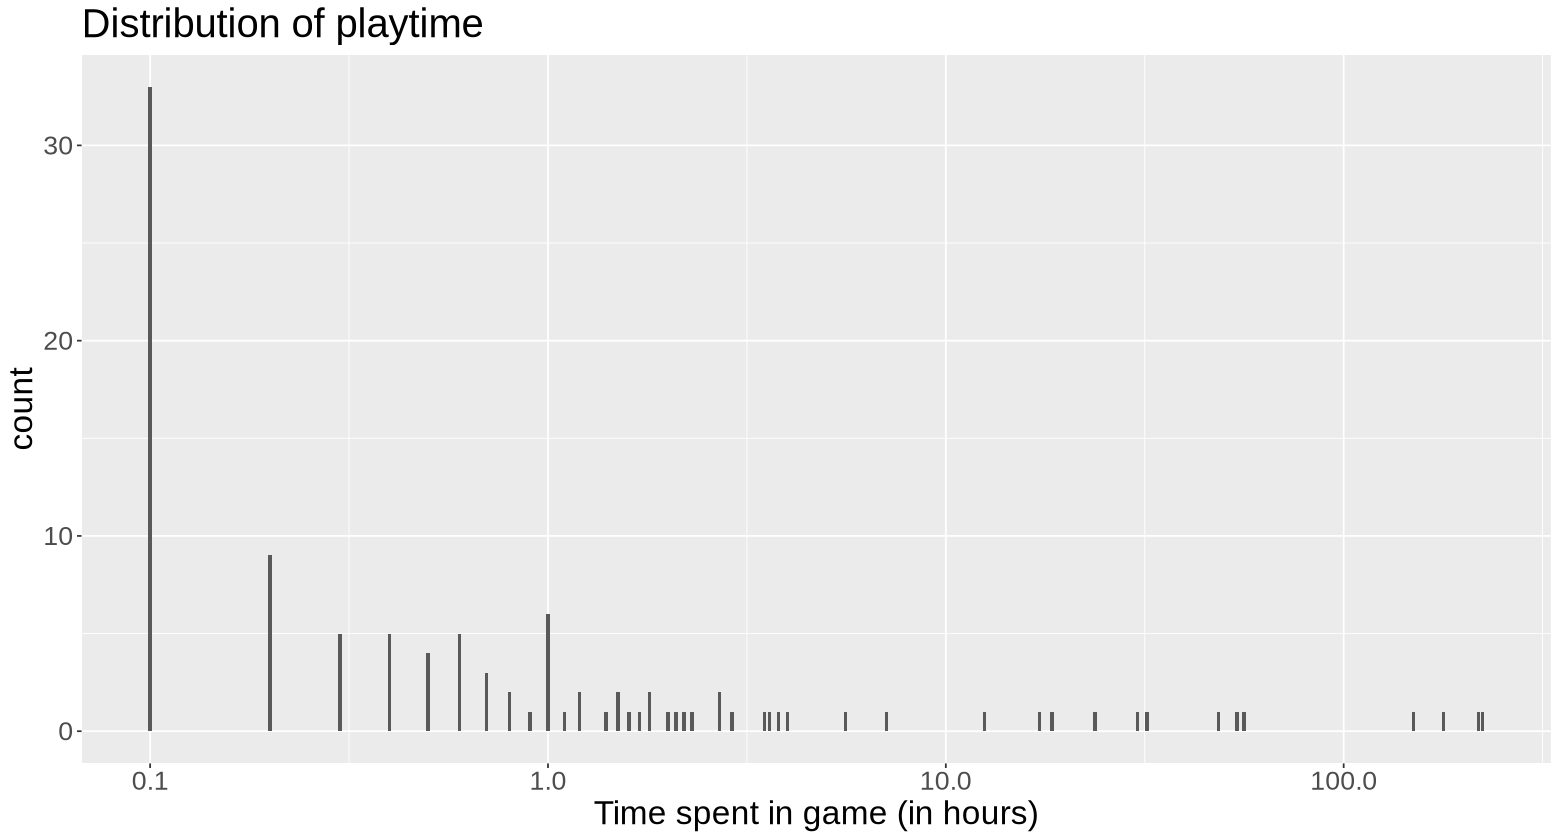

In [29]:
options(repr.plot.width = 13, repr.plot.height = 7)

age_plot <- player_data |>
    ggplot(aes(x = Age)) +
    geom_histogram(binwidth = 1) +
    labs(y = "Count", x = "Age (in years)", title = "Distribution of player ages") +
    theme(text = element_text(size = 20))

age_plot

hours_plot <- player_data |>
    ggplot(aes(x=played_hours))+
    geom_bar(state = identity) +
    labs(x = "Time spent in game (in hours)", title = "Distribution of playtime") +
    theme(text = element_text(size = 14)) +
    scale_x_log10(labels = label_comma()) +
    theme(text = element_text(size = 20))
hours_plot

The exploratory visualizations indicate that the general playerbase is between 10 and 30 years old. It also shows how the majority of players spend around an hour in game.

Warning message in scale_y_log10(labels = label_comma()):
“log-10 transformation introduced infinite values.”


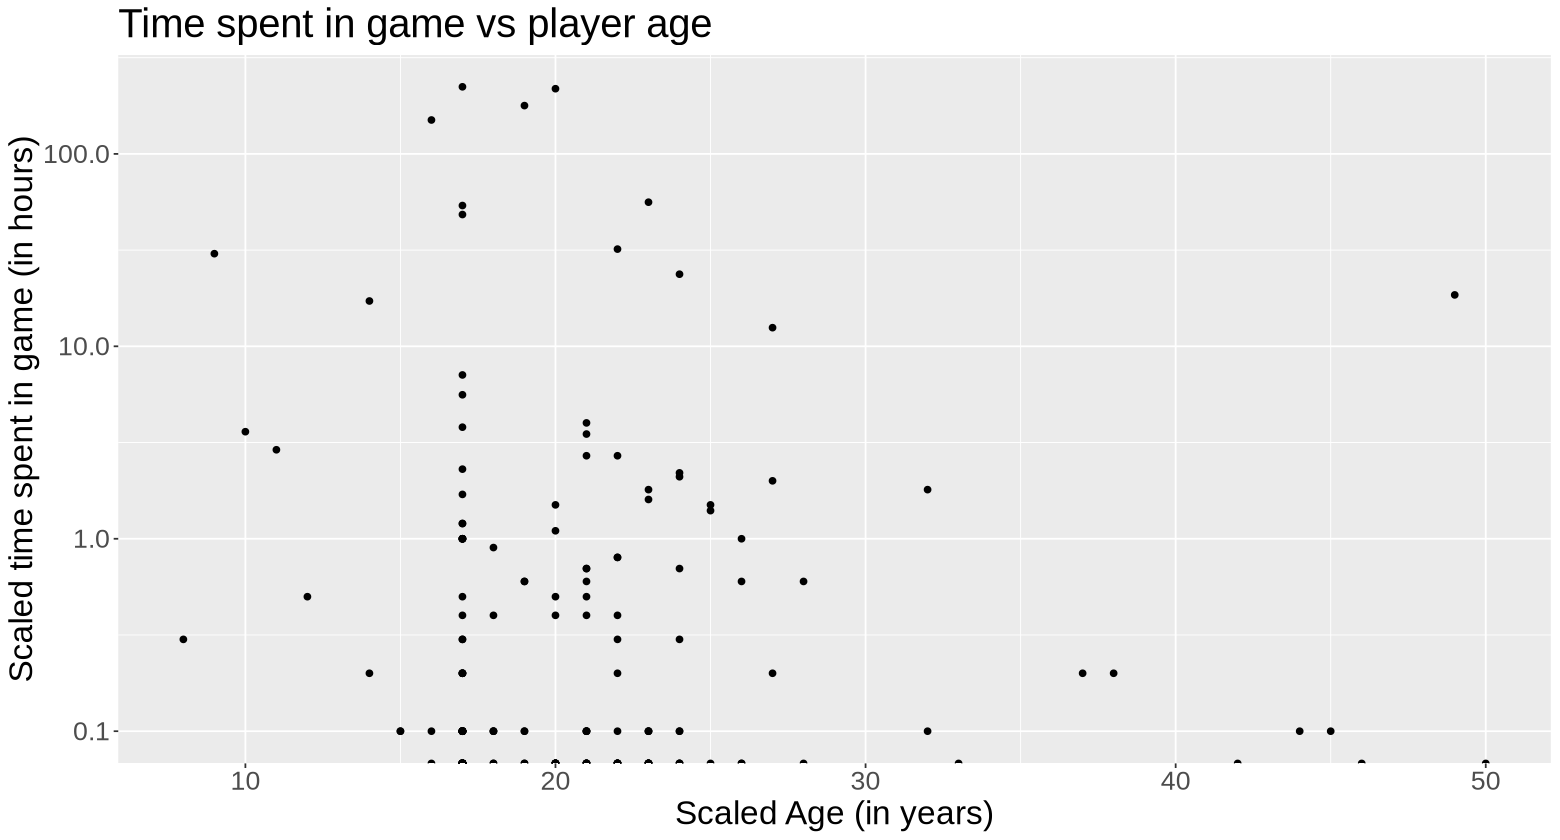

In [39]:
hours_and_age_plot <- player_data |>
    ggplot(aes(x = Age, y =played_hours)) +
    geom_point()+
    labs(y = "Scaled time spent in game (in hours)", x = "Scaled Age (in years)", title = "Time spent in game vs player age") +
    scale_y_log10(labels = label_comma()) +
    theme(text = element_text(size = 20)) 
    
hours_and_age_plot

This visualization indicates the time spent in the game vs. player age for the dataset. Generally, younger players, ages 15 to 30, tend to engage more heavily with the game than older age groups.

### Training Prediction Model

Now that the data is wrangled and statistics have been calculated, this allows for the creation of the KNN classification model, the main goal of this project.

The main problem posed in this project, is a classification problem. This type of problem entails making predictions of the future depending on past data. (Timbers et al., 2022)

As such, a KNN classification model was selected as it met the needs for predicting if a player would or would not subscribe to the game newsletter. `Age` and `played_hours` will be used as predictors, while `subscribe` will be used as the predicted class., a prediction of `1` would mean they have subscribed, while a prediciton of `0` would mean they have not.

In [7]:
## Splitting training and testing datasets
set.seed(2025)

player_split <- initial_split(player_data, prop = 0.75, strata = subscribe)  
player_training <- training(player_split)
player_testing <- testing(player_split)

This operation splits the dataset into a seperate and training set, with 75% of the dataset being reserved for training a model, while the rest of reserved for testing the model. This is done to ensure the model is given fresh data when testing to make sure it can be accruately evaluated. (Timbers et al., 2022) In the same way somebody wouldn't study with the answers open, if the whole dataset is used to train the model, then its performance cannot be evaluated effectively as it is designed to know the answers. 

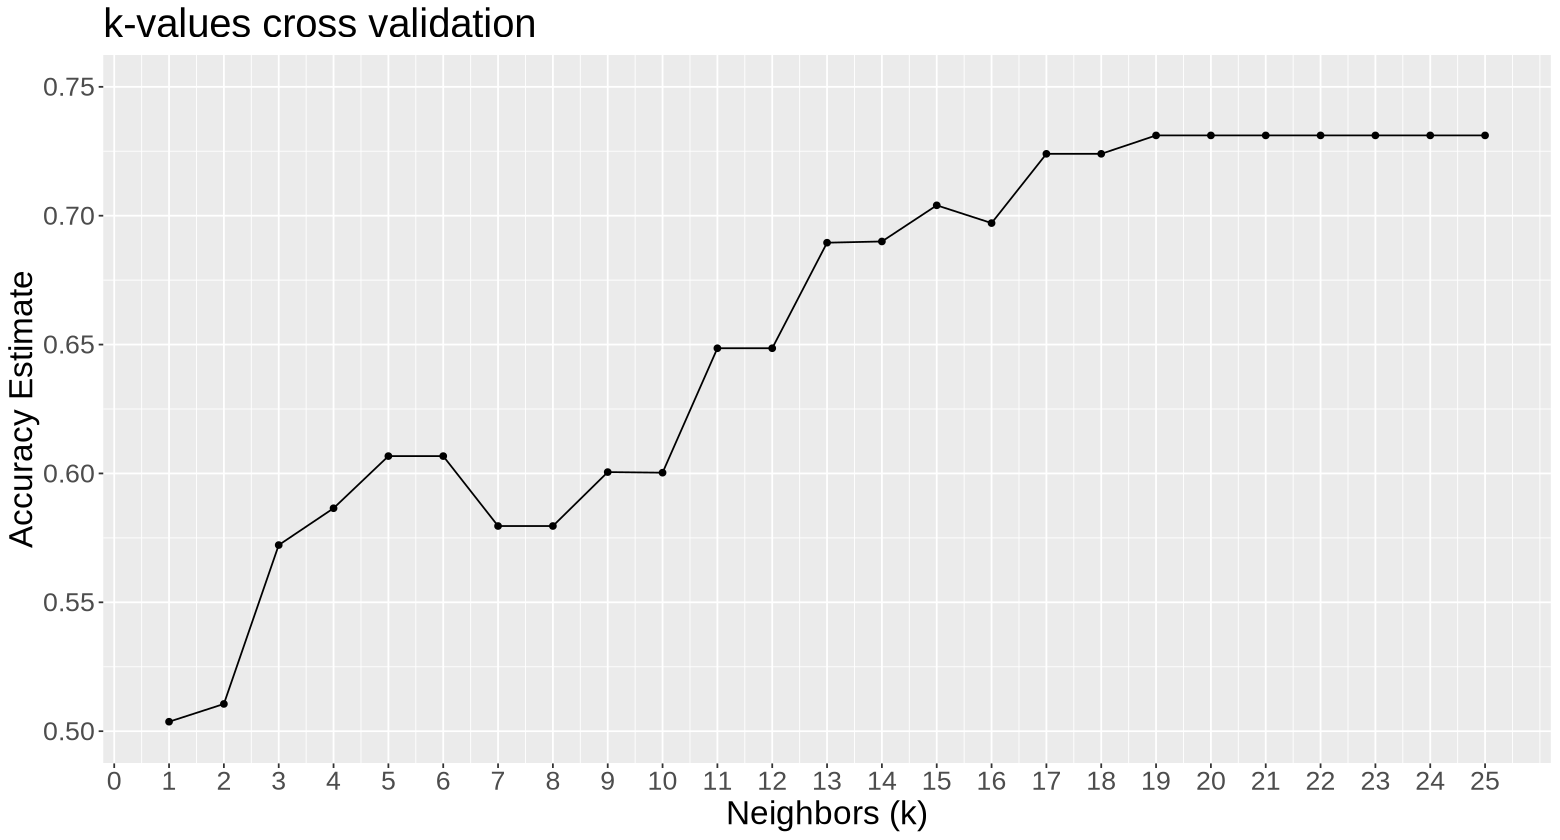

In [50]:
## Testing and cross-validation for N value
set.seed(2025)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn")|>
    set_mode("classification")

player_recipe <- recipe(subscribe ~ played_hours + Age, data = player_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

player_vfold <- vfold_cv(player_training, v = 5, strata = subscribe)

k_vals <- tibble(neighbors = seq(from = 1, to = 25, by = 1))
player_results <- workflow() |>
      add_recipe(player_recipe) |>
      add_model(knn_spec) |>
      tune_grid(resamples = player_vfold, grid = k_vals) |>
      collect_metrics()

accuracies <- player_results |>
     filter(.metric == "accuracy")

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors (k)", y = "Accuracy Estimate")+
      ggtitle("k-values cross validation") +
      scale_x_continuous(breaks = seq(0, 25, by = 1)) + 
      scale_y_continuous(limits = c(0.5, 0.75)) +
      theme(text = element_text(size = 20))

        
    
cross_val_plot

After splitting into different sets, the model is then trained and cross validated. (continue writing)

The graph indicates anything from 19 and onwards will provide the greatest accuracy, as such, we will be selecting 19 as the canadidate for K. However, it should be noted that the model behvaiour is abnormal. As K increases, there is a point where the accuracy should decerase. This is due to overfitting and underfitting of the model and any data points. As this behaviour is not seen, this can indicate that there may be better model for prediction compared to using KNN. (elaborate further)

In [17]:
## Setting parameters for the final model

knn_spec_cv <- nearest_neighbor(weight_func = "rectangular", neighbors = 19) |>
      set_engine("kknn") |>
      set_mode("classification")

player_fit <- knn_spec_cv |> 
       fit(subscribe ~ played_hours + Age, data = player_training)

player_predictions <- predict(player_fit, player_testing) |>
      bind_cols(player_testing)

player_metrics <- player_predictions |>
        metrics(truth = subscribe, estimate = .pred_class)  
player_metrics

player_conf_mat <- player_predictions |> 
      conf_mat(truth = subscribe, estimate = .pred_class)
player_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6530612
kap,binary,-0.1426612


          Truth
Prediction  0  1
         0  0  4
         1 13 32

In [ ]:
new_obs <- c(33, 10)

## 3. Discussion

### Result Summery

- The accuracy of the model is determined during the process of building a classification model. the accuracy is found to be 0.653, which indicates a 65.3% of successful rate on predicting the subscribe status from age and played hours.

### Expected findings

- Dataset is incomplete, accuracy doessn't have to be the best, small sample, contributes to low accuracy due to the model reqiring a large amount of data
- Data Wrangling: During the process of data wrangling, it is excepted to clean, organize and transform the dataset into a structured format for data analysis, by filtering and keeping the variables that we are focusing on (age, played hours and subscribe status. The maximum, minimum and mean played hours and age are calculated.
- Visualizations: 
- Prediction model: Creating the classification model is expected to train and categoriae data into predefined classes or groups based on patterns in the input features. By building a KNN model, the confusion matrix and the performance matrix, the summary of classification performance model is revealed. The reliability of the model is evaluate through the accuracy of predicting whether the player is subscribed from age and played hours.

discuss whether this is what you expected to find?
discuss what impact could such findings have?
discuss what future questions could this lead to?

### Impact of the findings
- The accuracy of this model is 65.3%, suggesting that `age` and `played_hours` do provide some signal for predicting `subscribe`. This illustrate that user engagement and user's age are relevant, but not definitive with whether a user would subscribe or not.
- While `age` and `played_hours` might be correlated with `subscribe`, they are not sufficient on their own to build a reliable predictive model. This suggests that it may need to incorporate more other features.

### Furture quesitons the result lead to

## 4. References

Timbers, T., Campbell, T., & Lee, M. (2022). Data Science. CRC Press.